In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
from datetime import date
import glob

C:\Users\c_ull\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
path=r'revamped_election_maps/'
all_files = glob.glob(path+"*_revamped.csv")

full_revamped=[]
for file in all_files:
    usecols=['id_number','dob','registration_date','voter_status','party_code','county_1','municipality',"muni_elect_2021_party","gen_elect_2020_party",]
    df = pd.read_csv(file, usecols=usecols,low_memory=False,dtype=str)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    full_revamped.append(df)
df2=pd.concat(full_revamped,sort=False)

D              45.72
R              39.54
Other          14.65
didn't vote     0.09
Name: party1, dtype: float64


<AxesSubplot:>

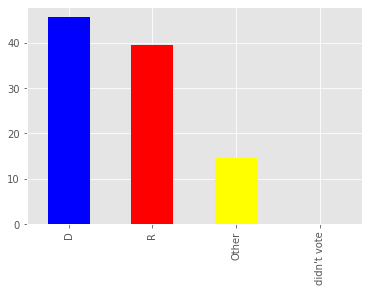

In [3]:
keys=["R",'D',np.nan]
values=["R",'D',"didn't vote"]
party_dict=dict(zip(keys,values))
df2['party1']=df2.party_code.map(party_dict).replace(np.nan,'Other')
df2['voted_21']=df2.muni_elect_2021_party.replace(np.nan,"didn't vote")
df2['voted_20']=df2.gen_elect_2020_party.replace(np.nan,"didn't vote")
c=['Blue','Red','Yellow']

print(((df2['party1'].value_counts()/df2.id_number.count())*100).round(2))
((df2['party1'].value_counts()/df2.id_number.count())*100).round(2).plot(kind='bar',color=c)

In [25]:
df2['dob']=pd.to_datetime(df2.dob,errors="coerce")
df2['registration_date']=pd.to_datetime(df2.registration_date,errors="coerce")
#df2['last_vote_date']=pd.to_datetime(df2.last_vote_date,errors="coerce")
today=date.today()
df2['age']=((today-df2.dob.dt.date).dt.days)/365 

In [26]:
def get_num_people_by_age_category(df):
    df2["age_group"] = pd.cut(x=df2['age'], bins=[18,25,35,45,55,65,75,100], labels=["18-24","25-34","35-44","45-54","55-64","65-74","75+"])
    return df2

df2['age_group']=pd.cut(x=df2['age'], bins=[18,25,35,45,55,65,75,100], labels=["18-24","25-34","35-44","45-54","55-64","65-74","75+"])

In [11]:
df2['voted_21']=df2.muni_elect_2021_party.map(party_dict).replace(np.nan,'Other')
df2['voted_20']=df2.gen_elect_2020_party.map(party_dict).replace(np.nan,'Other')

In [27]:
roe=pd.to_datetime("2022-06-24")

<AxesSubplot:>

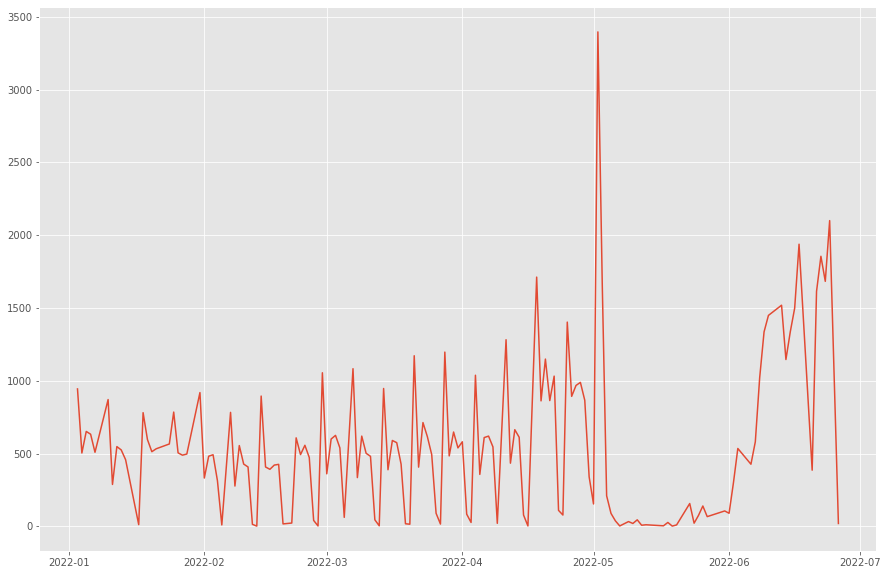

In [28]:
df2[df2.registration_date.dt.year==2022].registration_date.dt.date.value_counts().sort_index().plot(kind="line",figsize=(15,10))

In [29]:
df2[df2.registration_date.dt.year==2022].registration_date.dt.date.value_counts().sort_index().tail(30)

2022-05-16       6
2022-05-17       4
2022-05-18      27
2022-05-19       2
2022-05-20      10
2022-05-23     157
2022-05-24      22
2022-05-25      75
2022-05-26     140
2022-05-27      67
2022-05-31     106
2022-06-01      90
2022-06-02     300
2022-06-03     535
2022-06-06     427
2022-06-07     581
2022-06-08    1022
2022-06-09    1336
2022-06-10    1449
2022-06-13    1519
2022-06-14    1146
2022-06-15    1337
2022-06-16    1499
2022-06-17    1938
2022-06-20     386
2022-06-21    1614
2022-06-22    1855
2022-06-23    1683
2022-06-24    2100
2022-06-26      20
Name: registration_date, dtype: int64

<AxesSubplot:>

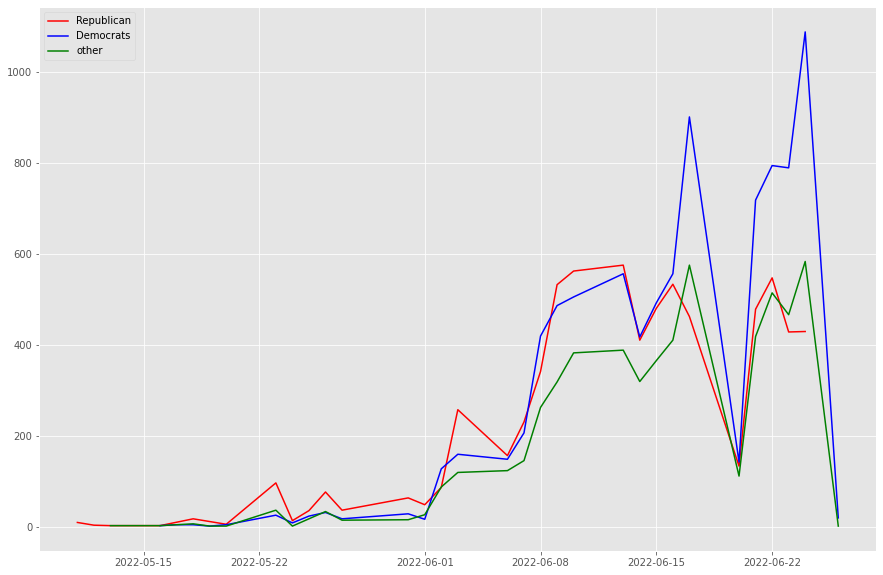

In [30]:
df2[(df2.party1=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.date.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party1=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.date.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.date.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/475916715.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.party1=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/475916715.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.party1=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/475916715.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.we

<AxesSubplot:>

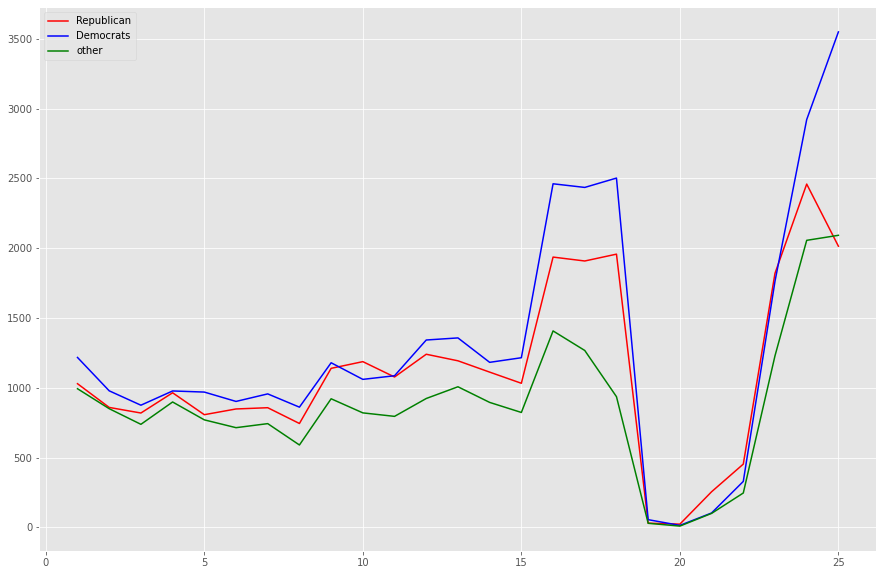

In [31]:
df2[(df2.party1=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party1=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

<AxesSubplot:>

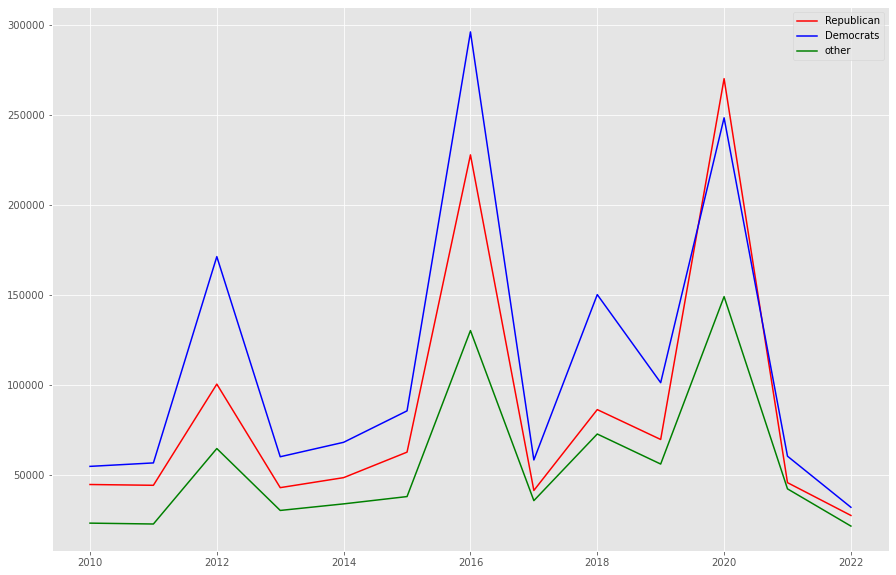

In [32]:
df2[(df2.party1=='R')&(df2.registration_date.dt.year>=2010)].registration_date.dt.year.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party1=='D')&(df2.registration_date.dt.year>=2010)].registration_date.dt.year.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year>=2010)].registration_date.dt.year.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='other')

In [33]:
df2.age_group.value_counts()

55-64    1556913
25-34    1480529
35-44    1392289
45-54    1329781
65-74    1324657
75+       955171
18-24     699127
Name: age_group, dtype: int64

In [34]:
younger_voters=['18-24','25-34']

In [35]:
df2[(df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index()#.plot(kind='line')

C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/2993243505.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index()#.plot(kind='line')


1     1754
2     1566
3     1347
4     1567
5     1373
6     1359
7     1445
8     1299
9     1893
10    1851
11    1810
12    2107
13    2287
14    1989
15    1987
16    3733
17    3628
18    3987
19      69
20      32
21     310
22     589
23    2938
24    4462
25    4746
Name: registration_date, dtype: int64

C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/277336309.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line',label='18-34 year olds',legend=True)


<AxesSubplot:>

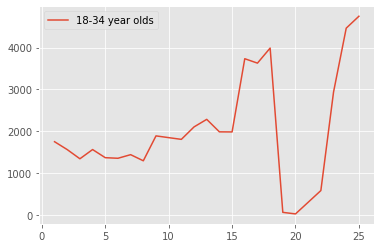

In [36]:
df2[(df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line',label='18-34 year olds',legend=True)

In [37]:
df2[(~df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index()#.plot(kind='line')

C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/824589916.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(~df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index()#.plot(kind='line')


1     1488
2     1124
3     1088
4     1275
5     1176
6     1108
7     1114
8      899
9     1349
10    1219
11    1151
12    1401
13    1273
14    1203
15    1086
16    2074
17    1985
18    1411
19      48
20      17
21     151
22     442
23    1877
24    2977
25    2912
Name: registration_date, dtype: int64

C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/1972222069.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(~df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line')


<AxesSubplot:>

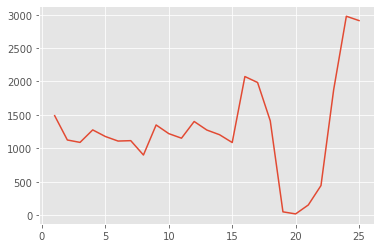

In [38]:
df2[(~df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line')

C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/4083550115.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line',label='18-34 year olds',legend=True,figsize=(15,12))
C:\Users\c_ull\AppData\Local\Temp/ipykernel_3824/4083550115.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(~df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line',label='35+',legend=True,figsize=(15,12))


<AxesSubplot:title={'center':'New Voter Registrations by week in 2022'}>

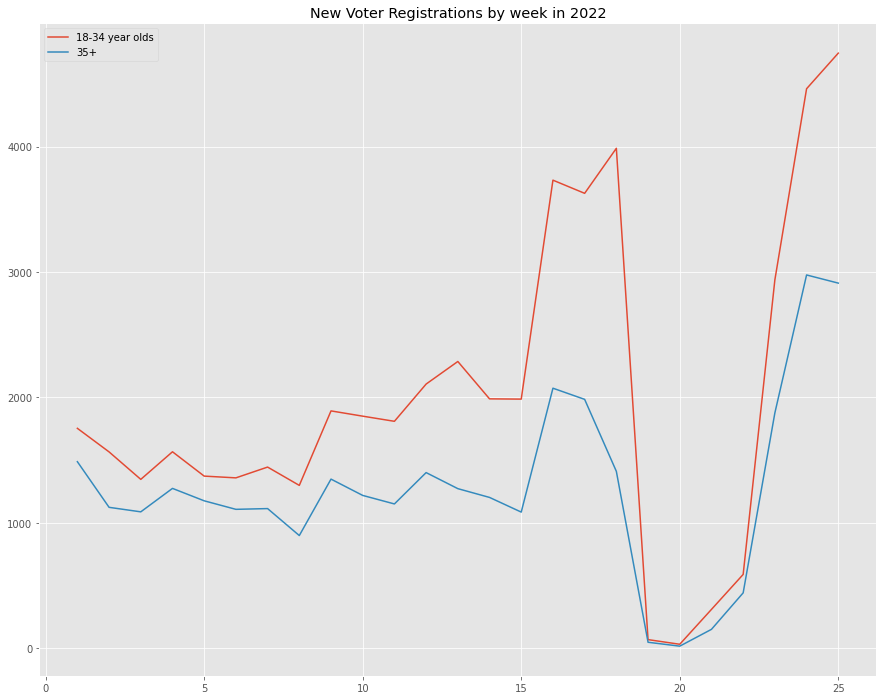

In [39]:
plt.title("New Voter Registrations by week in 2022")
df2[(df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line',label='18-34 year olds',legend=True,figsize=(15,12))
df2[(~df2.age_group.isin(younger_voters))&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().plot(kind='line',label='35+',legend=True,figsize=(15,12))

In [ ]:
df2.registration_date.dt.week.value_counts().sort_index()

In [ ]:
df2[df2.registration_date.dt.year>=2010].registration_date.dt.year.value_counts().describe()

In [80]:
df2['voted_21']=df2.muni_elect_2021_party.replace(np.nan,"didn't vote")
df2['voted_20']=df2.gen_elect_2020_party.replace(np.nan,"didn't vote")

AttributeError: 'DataFrame' object has no attribute 'gen_elect_2020_party'

In [61]:
df2[df2.party1=="didn't vote"]

,id_number,dob,registration_date,voter_status,party_code,municipality,muni_elect_2021_party,county_1,party1,age,age_group,voted_21
50457,107538025-01,1986-01-06,2016-05-23,I,NaN,New Oxford borough,NaN,ADAMS,didn't vote,36.517808,35-44,didn't vote
42441,002014493-02,1941-11-29,2000-10-01,A,NaN,Pittsburgh city,NaN,ALLEGHENY,didn't vote,80.652055,75+,didn't vote
45162,002020973-02,1977-06-17,2002-10-01,A,NaN,Whitehall borough,NaN,ALLEGHENY,didn't vote,45.079452,45-54,didn't vote
55381,002059222-02,1948-01-30,1978-04-01,A,NaN,Pittsburgh city,NaN,ALLEGHENY,didn't vote,74.479452,65-74,didn't vote
64563,002081208-02,1935-02-28,1988-06-01,A,NaN,Pittsburgh city,NaN,ALLEGHENY,didn't vote,87.408219,75+,didn't vote
...,...,...,...,...,...,...,...,...,...,...,...,...
242883,111551891-65,1981-07-10,2021-06-17,A,NaN,Fairfield township,NaN,WESTMORELAND,didn't vote,41.013699,35-44,didn't vote
36195,011801190-67,1961-03-17,2002-08-06,A,NaN,Windsor borough,NaN,YORK,didn't vote,61.342466,55-64,didn't vote
186436,102459021-67,1959-01-30,2009-02-20,A,NaN,Fairview township,NaN,YORK,didn't vote,63.471233,55-64,didn't vote
274113,110085283-67,1991-05-01,2020-01-25,A,NaN,York city,NaN,YORK,didn't vote,31.200000,25-34,didn't vote


In [63]:
#df2['party1']=df2.party_code.map(party_dict).replace(np.nan,'Other')
df2['voted_21']=df2.muni_elect_2021_party.map(party_dict).replace(np.nan,'Other')

In [64]:
df2.voted_21.value_counts()


didn't vote    5977254
D              1308383
R              1256063
Other           202767
Name: voted_21, dtype: int64

In [16]:
df2[(df2.party1!=df2.voted_21)&(df2.voted_21!="didn't vote")].groupby('voted_21').party1.value_counts()

voted_21  party1     
D         R              16404
          Other           2111
Other     R               8218
          D               4023
          didn't vote        7
R         D               3733
          Other           1646
Name: party1, dtype: int64

In [19]:
df2[(df2.party1!=df2.voted_20)&(df2.voted_20!="didn't vote")&(df2.party1!="didn't vote")].groupby('voted_20').party1.value_counts()/df2[(df2.party1!=df2.voted_20)&(df2.voted_20!="didn't vote")&(df2.party1!="didn't vote")].groupby('voted_20').party1.value_counts().sum()

voted_20  party1
D         R         0.330022
          Other     0.089343
Other     R         0.162578
          D         0.108457
R         D         0.175853
          Other     0.133746
Name: party1, dtype: float64

In [23]:
df2[(df2.party1!=df2.voted_20)&(df2.voted_20!="didn't vote")&(df2.party1!="didn't vote")].groupby('voted_20').party1.value_counts()

voted_20  party1
D         R         55216
          Other     14948
Other     R         27201
          D         18146
R         D         29422
          Other     22377
Name: party1, dtype: int64

In [21]:
0.330022+0.089343+0.162578+0.108457+0.175853+0.133746

0.9999990000000001

In [77]:
df2[df2].shape

(8744467, 12)

In [78]:
36142/8744467

0.004133127839581303

In [24]:
df2

,id_number,dob,registration_date,voter_status,party_code,municipality,gen_elect_2020_party,muni_elect_2021_party,county_1,party1,voted_21,voted_20,age,age_group,voted_22
0,001003958-01,1932-11-20,1955-01-01,A,R,Oxford township,R,R,ADAMS,R,R,R,89.682192,75+,R
1,001010053-01,1940-10-06,1965-01-01,A,R,Franklin township,R,NaN,ADAMS,R,didn't vote,R,81.800000,75+,R
2,001012944-01,1944-03-21,1968-01-01,A,R,Oxford township,R,NaN,ADAMS,R,didn't vote,R,78.342466,75+,R
3,001015834-01,1953-05-05,1975-01-01,A,R,Gettysburg borough,R,R,ADAMS,R,R,R,69.213699,65-74,R
4,001015914-01,1951-04-14,1975-01-01,A,D,Straban township,D,D,ADAMS,D,D,D,71.273973,65-74,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307439,112236462-67,1994-06-17,2022-06-24,A,D,Conewago township,NaN,NaN,YORK,D,didn't vote,didn't vote,28.068493,25-34,didn't vote
307440,112236617-67,1969-04-02,2022-06-24,A,D,York city,NaN,NaN,YORK,D,didn't vote,didn't vote,53.293151,45-54,didn't vote
307441,112236659-67,1963-02-04,2022-06-24,A,R,Manchester township,NaN,NaN,YORK,R,didn't vote,didn't vote,59.454795,55-64,didn't vote
307442,112237395-67,1991-02-19,2022-06-24,A,D,York city,NaN,NaN,YORK,D,didn't vote,didn't vote,31.394521,25-34,didn't vote
